# DSCI 521: Data Analysis and Interpretation
# Term Project: Predicting the Likelyhood of a Stroke
# Group Five: Hannah Wurzel, Joey Chan, Nick Babcock, Kunal Chhabria


### Team Background

- Hannah Wurzel: I am a current Masters student in the Data Science program.  I studied computer science and mathematics in my undergrad.  I am comfortable with coding in Python and the mathematical techniques that are behind most of the algorithms we will be using to analyze our dataset.

- Joey Chan: I am a fifth quarter Master student in the Information System program with a minor in Data Science. For my undergraduate, I went to University of Pittsburgh for Rehabilitation Science and Information Science. I have experience with Python. I am hope to futher hone my skills with python.

- Nick Babcock:  I am a first year Data Science master's student and have limited experience with coding but am getting better as I continue to get more exposure. I have a great deal of experience with various math disciplines such as linear algebra, differential equations, calculus, differential equations, and more due to my undergraduate studies in physics and mathematics, so quantitative methods is something I'm very comfortable with. I am interested in analyzing data in order to gain a positive insight and hope to one day work in the sports analytics or healthcare industries. I would like to continue to grow my coding skills and want to gain experience with NLP, machine learning, and database management.

- Kunal Chhabria:  I am Kunal Chhabria, graduate student pursuing Master’s in Data Science degree at Drexel University and this is my second quarter here. I completed my Bachelor’s in Computer Applications in India. I worked as a junior system administrator for a year and a half back home. My self identified skills include operating Linux OS, problem solving with computers, logical thinker and good at math topics like linear algebra, calculus. I also added python and data aquisition techniques to my skills with DSCI 511 class in the Fall term. With DSCI 521 I would like to learn to better manipulate data, manage and analyze large data sets, visualize data with the help of python modules most importantly learn to get insights from data sets. 

## What Our Analysis Will Accomplish
Nearly 795,000 people in the United States experience a stroke yearly.  From this group of people, 610,000 of these are first time occurances.  (https://www.cdc.gov/stroke/facts.htm#:~:text=Every%20year%2C%20more%20than%20795%2C000,are%20first%20or%20new%20strokes.&text=About%20185%2C000%20strokes%E2%80%94nearly%201,have%20had%20a%20previous%20stroke.&text=About%2087%25%20of%20all%20strokes,to%20the%20brain%20is%20blocked.)  These scary statistics led our group to want to learn more about strokes and when they tend to occur to people. In this project, we are aiming to prove if there are any predictors that a stroke may occur in a person.

To accomplish this task we will be using a dataset collected from Kaggle called *Stroke Prediction Dataset*.  This dataset includes over 5,000 rows of data and twelve relevant columns of information per person.  These columns store information such as age, if the patient has hypertension, their BMI and other descriptors.  This dataset includes a wide range of people spanning all different ages, weights, and ways of living. 

With the use of this dataset, we are hopeful that we will be able to extract meaningful information about which parameters in a person are most useful in predicting a stroke.  Aside from physcial characteristics, we will also be analyzing information about a persons daily life such as marital status, if they are a smoker, etc. to determine if any of these outside factors have an effect on whether a stroke is more likely to occur or not. 

## Who may be interested in our data
We hope our findings are useful to a wide range of people including both medical professionals and everyday individuals.  Strokes are something that happen regardless of social and economic status, meaning that everyone should be cognizant of the causes and implications if one were to occur.  We hope our analysis will be useful in predicting the likelyhood that a stroke may occur in all types of people as these predictions could be live-saving.

## Application of Analysis

Our analysis could serve several purposes but the most common one would be for medical insurance or life insurance companies. These companies, espcially life insurance, normally charge their customers a rate that is determined by their medical history and maybe even their family history. Our analysis could be used to determine whether or not a person is likely to have a stroke in the future, thus resulting in a higher charge for medical and / or life insurance. Another way our analysis could be applied is for personal use. If our analysis is able to show a person whether or not they are likely to have a stroke in the future, it could be enough to help that person develope healthier habbits in order to reduce their risk of having a stroke in the future.

## How our analysis is limited
Our analysis is based off of a study that was conducted with 5111 participants and while that seems like a big sample size, it could be expanded in order to obtain more accurate results. This study was also conducted in the United States, so these results may not apply to people who are living in other parts of the world. Our analysis could be improved by expanding to other parts of the world. It could also improve by adding more attributes to our data such as family medical history.

### Exhibition of Our Data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Preprocessing

Next, we will be using the `info()` function to look further into the data. Using this funciton we can see that there are 5110 rows and 12 total columns. We are also able to see that there is some missing information in the `bmi` column, 201 NA's to be exact. These will be deleted before we complete any analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# taking out nulls
df = df.dropna(axis=0)
print(df.shape)

(4909, 12)


Another aspect of this dataset that will need to be altered are the categorical columns. This inclues the `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking status` columns. After completing some EDA will will transform these attributes into numerical attributes so we are able to use various models on the data.

### Exploratory Data Analysis

To begin our EDA we are first using the `.describe()` function to get a better understanding of the individuals encapsulated in our data.

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Our next step in the EDA is to plot all of the attributes so we are visually able to see if there are any trends amongst the data as it relates to having a stoke.  First we will graph each attribute against their value counts.  Then we will go a step further and compare each attribute to whether or not that person had a stroke.

In [7]:
from matplotlib import pyplot as plt

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

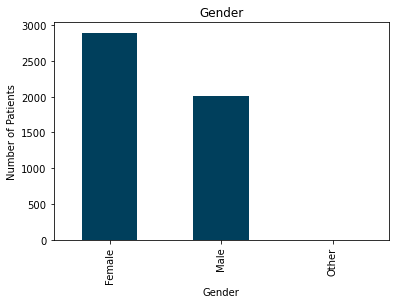

In [8]:
# gender distribution
df['gender'].value_counts().plot(kind='bar', title = 'Gender', xlabel='Gender', ylabel='Number of Patients',color='#003f5c') 
df['gender'].value_counts()                                    # 59% female, 41% male, only 1 value listed as 'Other'

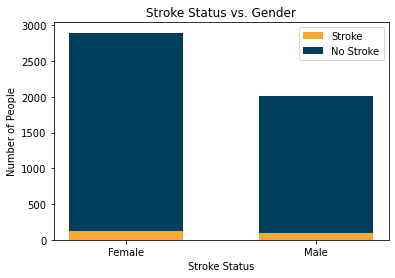

In [9]:
# count of females and males that had and didn't have strokes
fem = df['gender'] == 'Female'
female = df[fem]
fYstroke = female['stroke'] == 1
fstrokeY = female[fYstroke]
fNstroke = female['stroke'] == 0
fstrokeN = female[fNstroke]

male = df[-fem]
mYstroke = male['stroke'] == 1
mstrokeY = male[mYstroke]
mNstroke = male['stroke'] == 0
mstrokeN = male[mNstroke]


# chart
status = ['Female', 'Male']
stro = [len(fstrokeY), len(mstrokeY)]
nostro = [len(fstrokeN), len(mstrokeN)]

w = 0.6
plt.bar(status, stro,  w, color = '#ffa632', label='Stroke')
plt.bar(status, nostro, w, bottom = stro, color = '#003f5c', label='No Stroke')

plt.xlabel("Stroke Status")
plt.ylabel("Number of People")
plt.title('Stroke Status vs. Gender')
plt.legend()
plt.show()

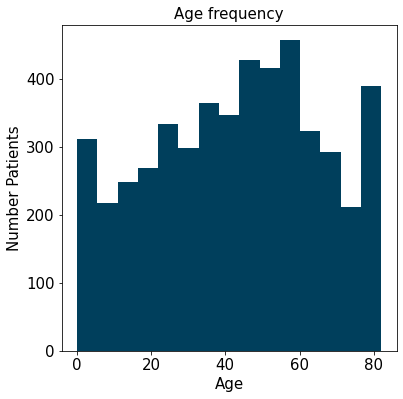

In [10]:
# age distribution
hist_fig = plt.figure(figsize = (6, 6))

_  = plt.hist(df["age"], bins = 15, color='#003f5c')

plt.tick_params(labelsize = 15)
_ = plt.title("Age frequency", fontsize = 15)
_ = plt.ylabel("Number Patients", fontsize = 15)
_ = plt.xlabel("Age", fontsize = 15)

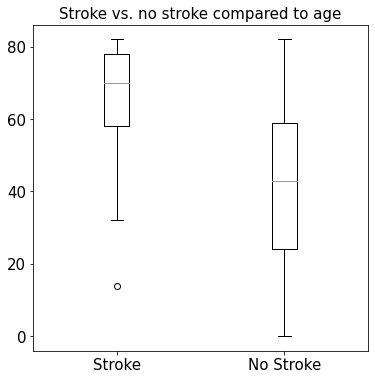

In [11]:
# stroke vs. no stroke compared to age
yes_stroke = df['stroke'] == 1
had_stroke = df[yes_stroke]
no_stroke = df[-yes_stroke]

fig = plt.figure(figsize = (6, 6))
_ = plt.boxplot(
    [had_stroke["age"], 
     no_stroke["age"], 
     ], 
    labels = ["Stroke", "No Stroke"])
plt.tick_params(labelsize = 15)
_ = plt.title("Stroke vs. no stroke compared to age", fontsize = 15)

Yes    3204
No     1705
Name: ever_married, dtype: int64

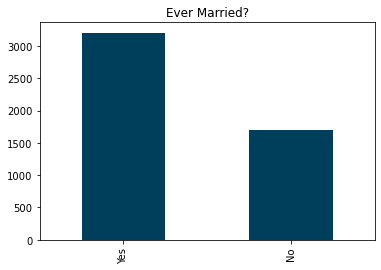

In [12]:
# marriage
df['ever_married'].value_counts().plot(kind='bar', title = 'Ever Married?', color='#003f5c') # 65% married, 34% not married
df['ever_married'].value_counts()

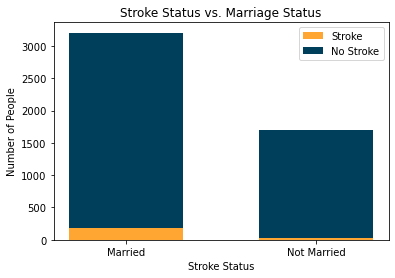

In [13]:
# marriage vs. stroke
mar = df['ever_married'] == 'Yes'
married = df[mar]
mYstroke = married['stroke'] == 1
mstrokeY = married[mYstroke]
mNstroke = married['stroke'] == 0
mstrokeN = married[mNstroke]

notmar = df[-mar]
nmYstroke = notmar['stroke'] == 1
nmstrokeY = notmar[nmYstroke]
nmNstroke = notmar['stroke'] == 0
nmstrokeN = notmar[nmNstroke]

# chart
status = ['Married', 'Not Married']
s = [len(mstrokeY), len(nmstrokeY)]
ns = [len(mstrokeN), len(nmstrokeN)]

w = 0.6
plt.bar(status, s, w, color = '#ffa632', label='Stroke')
plt.bar(status, ns, w, bottom = s, color = '#003f5c', label='No Stroke')

plt.xlabel("Stroke Status")
plt.ylabel("Number of People")
plt.title('Stroke Status vs. Marriage Status')
plt.legend()
plt.show()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

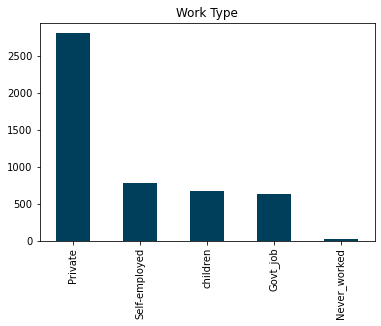

In [14]:
# work type
df['work_type'].value_counts().plot(kind='bar', title = 'Work Type', color='#003f5c') 
df['work_type'].value_counts()                                       

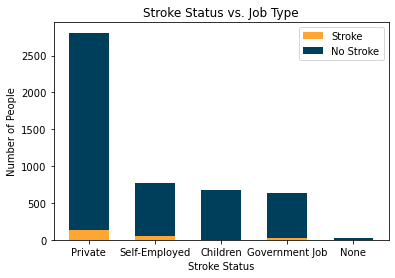

In [15]:
# job type vs. stroke
pri = df['work_type'] == 'Private'    # private
private = df[pri]
priYstroke = private['stroke'] == 1
pristrokeY = private[priYstroke]
pristroke = private['stroke'] == 0
pristrokeN = private[pristroke]

s = df['work_type'] == 'Self-employed'      # self-employed
sel = df[s]    
selYstroke = sel['stroke'] == 1
selstrokeY = sel[selYstroke]
selNstroke = sel['stroke'] == 0
selstrokeN = sel[selNstroke]

children = df['work_type'] == 'children'      # children
child = df[children]    
chYstroke = child['stroke'] == 1
chstrokeY = child[chYstroke]
chNstroke = child['stroke'] == 0
chstrokeN = child[chNstroke]

govern = df['work_type'] == 'Govt_job'      # government job
gov = df[govern]    
govYstroke = gov['stroke'] == 1
govstrokeY = gov[govYstroke]
govNstroke = gov['stroke'] == 0
govstrokeN = gov[govNstroke]

nev = df['work_type'] == 'Never_worked'      # never worked
never = df[nev]    
nevYstroke = never['stroke'] == 1
nevstrokeY = never[nevYstroke]
nevNstroke = never['stroke'] == 0
nevstrokeN = never[nevNstroke]

# chart
status = ['Private', 'Self-Employed', 'Children', 'Government Job', 'None']
st = [len(pristrokeY),len(selstrokeY),len(chstrokeY),len(govstrokeY),len(nevstrokeY)]
nost = [len(pristrokeN),len(selstrokeN),len(chstrokeN),len(govstrokeN),len(nevstrokeN)]

w = 0.6
plt.bar(status, st, w, color = '#ffa632', label='Stroke')
plt.bar(status, nost, w, bottom = st, color = '#003f5c', label='No Stroke')

plt.xlabel("Stroke Status")
plt.ylabel("Number of People")
plt.title('Stroke Status vs. Job Type')
plt.legend()
plt.show()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

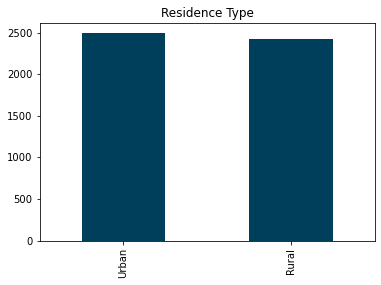

In [16]:
# residence type
df['Residence_type'].value_counts().plot(kind='bar', title = 'Residence Type', color='#003f5c') # pretty even between urban and rural
df['Residence_type'].value_counts()

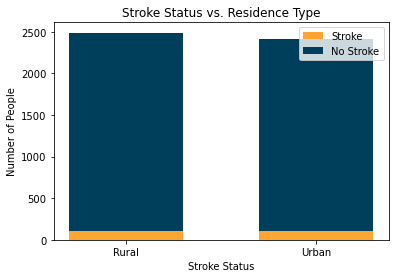

In [17]:
# residence type vs. stroke
u = df['Residence_type'] == 'Urban'
urban = df[u]
uYstroke = urban['stroke'] == 1
ustrokeY = urban[uYstroke]
uNstroke = urban['stroke'] == 0
ustrokeN = urban[uNstroke]

rural = df[-u]
rYstroke = rural['stroke'] == 1
rstrokeY = rural[rYstroke]
rNstroke = rural['stroke'] == 0
rstrokeN = rural[rNstroke]

# chart
status = ['Rural', 'Urban']
strok = [len(ustrokeY), len(rstrokeY)]
nostrok = [len(ustrokeN), len(rstrokeN)]

w = 0.6

plt.bar(status, strok, w, color = '#ffa632', label='Stroke')
plt.bar(status, nostrok, w, bottom = strok, color = '#003f5c', label='No Stroke')

plt.xlabel("Stroke Status")
plt.ylabel("Number of People")
plt.title('Stroke Status vs. Residence Type')
plt.legend()
plt.show()

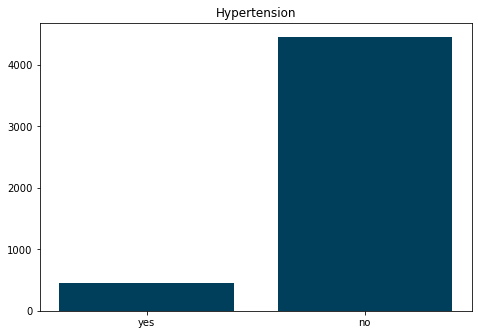

In [18]:
# hypertension
no, yes = df['hypertension'].value_counts() # 90% no hypertension
fig = plt.figure()                          # 10% hypertension
ax = fig.add_axes([0,0,1,1])
langs = ['yes', 'no']
students = [yes,no]
ax.bar(langs,students, color='#003f5c')
ax.set_title('Hypertension')
plt.show()

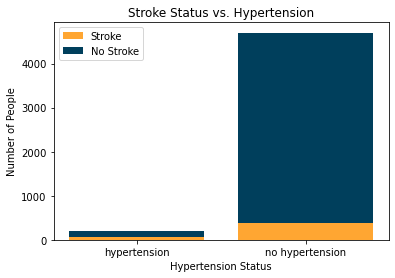

60 391
149 4309


In [19]:
# hypertension vs. stroke
h = df['hypertension'] == 1
hyper = df[h]
hs = hyper['stroke'] == 1
hyper_stroke = hyper[hs]
hyper_noStroke = hyper[-hs]
hs_num = hyper_stroke.shape[0]
hns_num = hyper_noStroke.shape[0]

not_hyper = df[-h]
nh_s = not_hyper['stroke'] == 1
nh_stroke = not_hyper[nh_s]
nh_nstroke = not_hyper[-nh_s]
nhs_num = nh_stroke.shape[0]
nhns_num = nh_nstroke.shape[0]


# chart
x = ['hypertension', 'no hypertension']
hyper = [hs_num, hns_num]
no_hyper = [nhs_num, nhns_num] 

plt.bar(x, hyper, color='#ffa632', label='Stroke')
plt.bar(x, no_hyper, bottom=hyper, color='#003f5c', label='No Stroke')
plt.xlabel("Hypertension Status")
plt.ylabel("Number of People")
plt.legend()
plt.title('Stroke Status vs. Hypertension')
plt.show()

print(hs_num, hns_num)    # 13% of people with hypertension also had a stroke
print(nhs_num, nhns_num)  # 3 % of people without hypertension had a stroke

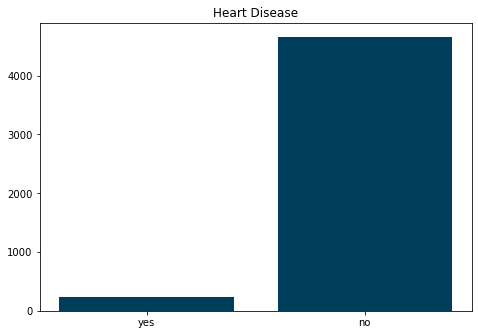

In [20]:
# Heart Disease
no, yes = df['heart_disease'].value_counts() 
fig = plt.figure()                          
ax = fig.add_axes([0,0,1,1])
langs = ['yes', 'no']
students = [yes,no]
ax.bar(langs,students, color='#003f5c')
ax.set_title('Heart Disease')
plt.show()

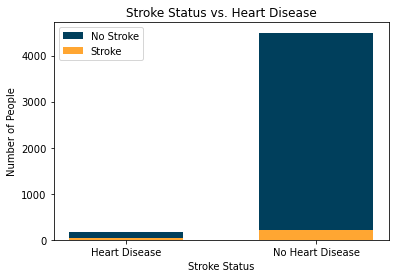

In [21]:
# heart disease vs. stroke
h = df['heart_disease'] == 0
heart = df[h]
hYstroke = heart['stroke'] == 1
hstrokeY = heart[hYstroke]
hNstroke = heart['stroke'] == 0
hstrokeN = heart[hNstroke]

noheart = df[-h]
nhYstroke = noheart['stroke'] == 1
nhstrokeY = noheart[nhYstroke]
nhNstroke = noheart['stroke'] == 0
nhstrokeN = noheart[nhNstroke]

# chart
status = ['Heart Disease', 'No Heart Disease']
attack = [len(hstrokeY), len(hstrokeN)]
noattack = [len(nhstrokeY), len(nhstrokeN)]

w = 0.6
plt.bar(status, attack, w, color = '#003f5c', label='No Stroke')
plt.bar(status, noattack, w, color = '#ffa632', label='Stroke')

plt.xlabel("Stroke Status")
plt.ylabel("Number of People")
plt.title('Stroke Status vs. Heart Disease')
plt.legend()
plt.show()

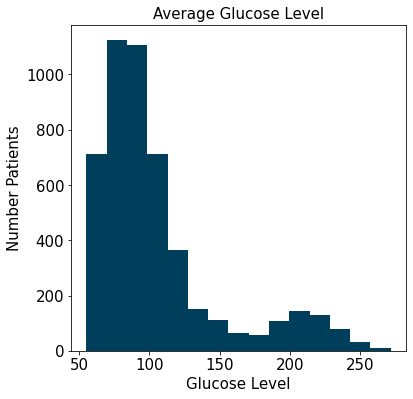

In [22]:
# avg glucose level
hist_fig = plt.figure(figsize = (6, 6))

_  = plt.hist(df["avg_glucose_level"], bins = 15, color='#003f5c')

plt.tick_params(labelsize = 15)
_ = plt.title("Average Glucose Level", fontsize = 15)
_ = plt.ylabel("Number Patients", fontsize = 15)
_ = plt.xlabel("Glucose Level", fontsize = 15)

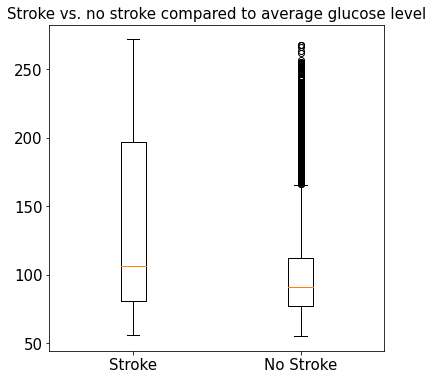

In [23]:
# glucose level vs. stroke
yes_stroke = df['stroke'] == 1
had_stroke = df[yes_stroke]
no_stroke = df[-yes_stroke]

fig = plt.figure(figsize = (6,6))
_ = plt.boxplot(
    [had_stroke["avg_glucose_level"], 
     no_stroke["avg_glucose_level"]
     ], 
    labels = ["Stroke", "No Stroke"])
plt.tick_params(labelsize = 15)
_ = plt.title("Stroke vs. no stroke compared to average glucose level", fontsize = 15)

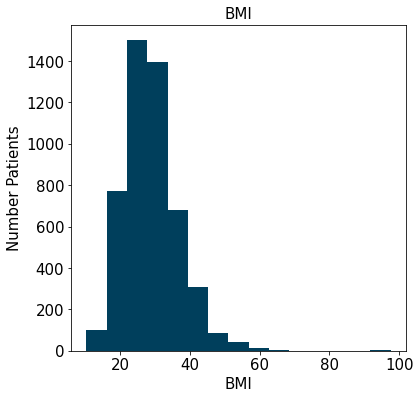

In [24]:
# BMI
hist_fig = plt.figure(figsize = (6, 6))

_  = plt.hist(df["bmi"], bins = 15, color='#003f5c')

plt.tick_params(labelsize = 15)
_ = plt.title("BMI", fontsize = 15)
_ = plt.ylabel("Number Patients", fontsize = 15)
_ = plt.xlabel("BMI", fontsize = 15)

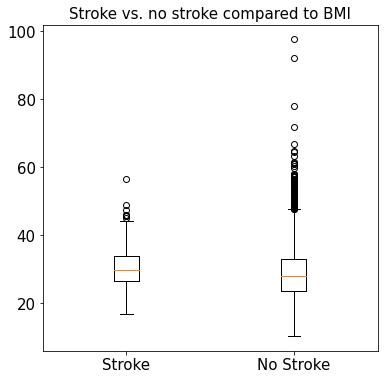

In [25]:
# BMI vs. stroke
yes_stroke = df['stroke'] == 1    
had_stroke = df[yes_stroke]
no_stroke = df[-yes_stroke]

fig = plt.figure(figsize = (6,6))
_ = plt.boxplot(
    [had_stroke["bmi"], 
     no_stroke["bmi"]
     ], 
    labels = ["Stroke", "No Stroke"])
plt.tick_params(labelsize = 15)
_ = plt.title("Stroke vs. no stroke compared to BMI", fontsize = 15)


never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

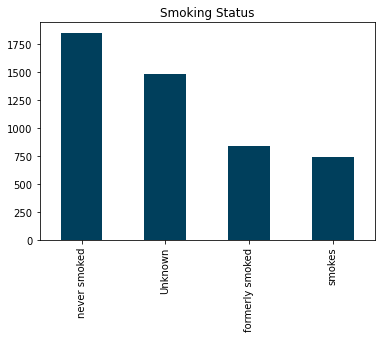

In [26]:
df['smoking_status'].value_counts().plot(kind='bar', title = 'Smoking Status', color='#003f5c') 
df['smoking_status'].value_counts()   

Had Stroke--  Never Smoked:  84 , Unknown:  29 , Formerly Smoked:  57 , Smokes:  39
No Stroke--  Never Smoked:  1768 , Unknown:  1454 , Formerly Smoked:  780 , Smokes:  698


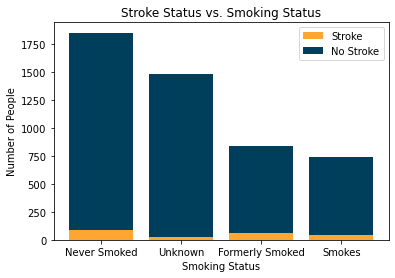

In [27]:
yes_stroke = df['stroke'] == 1
had_stroke = df[yes_stroke]
no_stroke = df[-yes_stroke]

hadS_never = (had_stroke['smoking_status'] == 'never smoked').sum()
hadS_unknown = (had_stroke['smoking_status'] == 'Unknown').sum()
hadS_formerly = (had_stroke['smoking_status'] == 'formerly smoked').sum()
hadS_smokes = (had_stroke['smoking_status'] == 'smokes').sum()
print('Had Stroke-- ', 'Never Smoked: ', hadS_never,',', 'Unknown: ', hadS_unknown,',', 'Formerly Smoked: ',hadS_formerly,',', 'Smokes: ',hadS_smokes)

noS_never = (no_stroke['smoking_status'] == 'never smoked').sum()
noS_unknown = (no_stroke['smoking_status'] == 'Unknown').sum()
noS_formerly = (no_stroke['smoking_status'] == 'formerly smoked').sum()
noS_smokes = (no_stroke['smoking_status'] == 'smokes').sum()
print('No Stroke-- ', 'Never Smoked: ', noS_never,',', 'Unknown: ', noS_unknown,',', 'Formerly Smoked: ',noS_formerly,',', 'Smokes: ', noS_smokes)

# chart
x = ['Never Smoked', 'Unknown', 'Formerly Smoked', 'Smokes']
hadS = [hadS_never, hadS_unknown, hadS_formerly, hadS_smokes]
noS = [noS_never, noS_unknown, noS_formerly, noS_smokes] 

plt.bar(x, hadS, color='#ffa632', label='Stroke')
plt.bar(x, noS, bottom=hadS, color='#003f5c', label='No Stroke')
plt.xlabel("Smoking Status")
plt.ylabel("Number of People")
plt.legend()
plt.title('Stroke Status vs. Smoking Status')
plt.show()

In [28]:
sdf = df[df['stroke']== 1]
sdf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [29]:
sdf_copy = sdf
sdf_copy['smoking_status'].replace(['formerly smoked', 'smokes', 'never smoked', 'Unknown'],[2,1,0,3], inplace=True)

/Users/nickbabs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


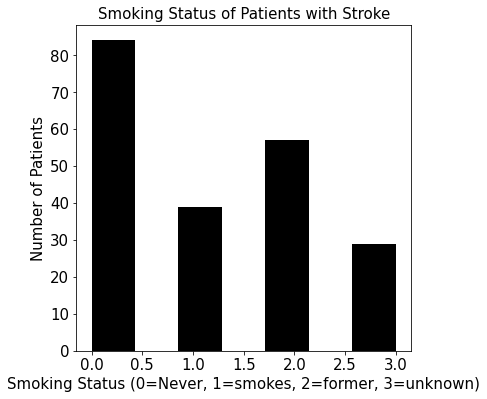

In [30]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(sdf_copy["smoking_status"], bins = 7, color = "black")

_ = plt.ylabel("Number of Patients", fontsize = 15)

_ = plt.xlabel("Smoking Status (0=Never, 1=smokes, 2=former, 3=unknown)", fontsize = 15)

_ = plt.title("Smoking Status of Patients with Stroke", fontsize = 15)

plt.tick_params(labelsize = 15)

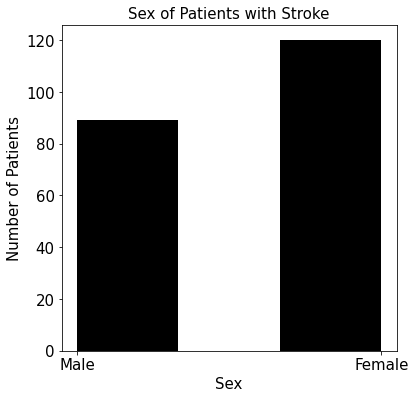

In [31]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(sdf_copy["gender"], bins = 3, color = "black")

_ = plt.ylabel("Number of Patients", fontsize = 15)

_ = plt.xlabel("Sex", fontsize = 15)

_ = plt.title("Sex of Patients with Stroke", fontsize = 15)

plt.tick_params(labelsize = 15)

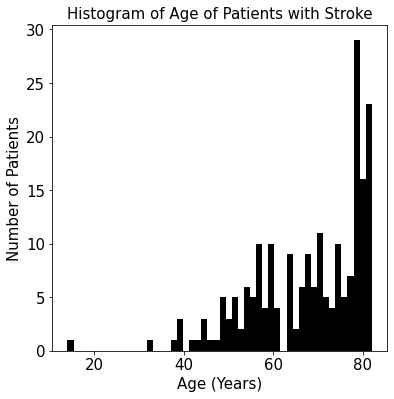

In [32]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(sdf["age"], bins = 50, color = "black")

_ = plt.ylabel("Number of Patients", fontsize = 15)

_ = plt.xlabel("Age (Years)", fontsize = 15)

_ = plt.title("Histogram of Age of Patients with Stroke", fontsize = 15)

plt.tick_params(labelsize = 15)

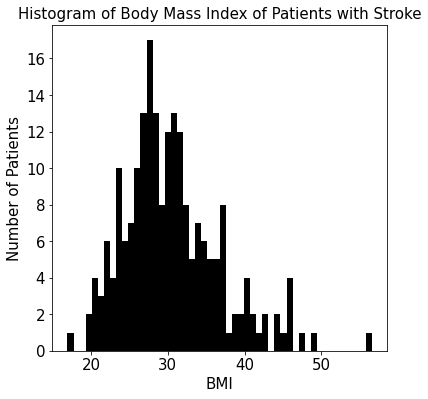

In [33]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(sdf["bmi"], bins = 50, color = "black")

_ = plt.ylabel("Number of Patients", fontsize = 15)

_ = plt.xlabel("BMI", fontsize = 15)

_ = plt.title("Histogram of Body Mass Index of Patients with Stroke", fontsize = 15)

plt.tick_params(labelsize = 15)

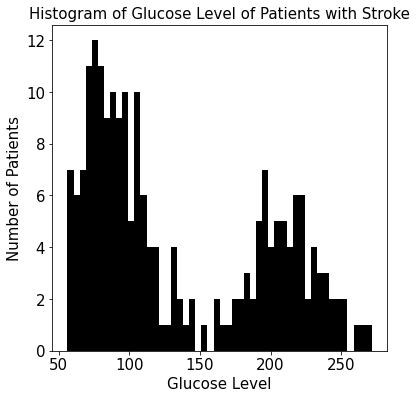

In [34]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(sdf["avg_glucose_level"], bins = 50, color = "black")

_ = plt.ylabel("Number of Patients", fontsize = 15)

_ = plt.xlabel("Glucose Level", fontsize = 15)

_ = plt.title("Histogram of Glucose Level of Patients with Stroke", fontsize = 15)

plt.tick_params(labelsize = 15)

### Models

Now that our EDA is wrapped up and we have a better understanding of the types of people that are involved in this dataset, we will move onto the model portion of our project.

The first step for this is to change all of the categorical data into numerical data.

In [32]:
# Gender --  Male : 0, Female : 1, Other: 2
df['gender'].replace(['Male', 'Female', 'Other'],[0,1,2], inplace=True)

# Ever Married -- No : 0, Yes : 1
df['ever_married'].replace(['No', 'Yes'],[0,1], inplace=True)

# Work Type -- Self Employed : 0, Govt Job : 1, Children : 2, Never Worked : 3
df['work_type'].replace(['Self-employed', 'Govt_job', 'children', 'Never_worked', 'Private'],[0,1,2,3,4], inplace=True)

# Residence Type -- Urban : 0, Rural : 1
df['Residence_type'].replace(['Urban', 'Rural'],[0,1], inplace=True)

# Smoking status -- Formerly smoked : 0, Never smoked : 1, Smokes : 2, Unknown : 3
df['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3], inplace=True)

In [33]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,4,0,228.69,36.6,0,1
2,31112,0,80.0,0,1,1,4,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,1,4,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,0,1,174.12,24.0,1,1
5,56669,0,81.0,0,0,1,4,0,186.21,29.0,0,1


Now that our data is converted, we are able to begin our models.  We will be using both Logistic Regression and K-Nearest-Neighbors.

#### Packages Needed

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns

#### Logistic Regression

In [71]:
#rearrange columns 
n_df = df[['id', 'gender', 'ever_married',
       'work_type', 'Residence_type','smoking_status', 'avg_glucose_level', 'bmi',  'age',
       'hypertension','stroke','heart_disease']]

#label encode the data using LabelEncoder
le_df = n_df

le = preprocessing.LabelEncoder()
le_ndf = le_df[['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']].apply(le.fit_transform)

#convert the label encoded dataframe to list to append to the other data
age = le_df['age'].values.tolist()
glu = le_df['avg_glucose_level'].values.tolist()
bmi = le_df['bmi'].values.tolist()
hype = le_df['hypertension'].values.tolist()
stk = le_df['stroke'].values.tolist()
hd = le_df['heart_disease'].values.tolist()

#add it to the dataframe
le_ndf['age'] = age
le_ndf['avg_glucose_level'] = glu
le_ndf['bmi'] = bmi
le_ndf['hypertension'] = hype
le_ndf['stroke'] = stk
le_ndf['heart_disease'] = hd
le_ndf.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi,hypertension,stroke,heart_disease
0,0,1,4,0,0,67.0,228.69,36.6,0,1,1
2,0,1,4,1,1,80.0,105.92,32.5,0,1,1
3,1,1,4,0,2,49.0,171.23,34.4,0,1,0
4,1,1,0,1,1,79.0,174.12,24.0,1,1,0
5,0,1,4,0,0,81.0,186.21,29.0,0,1,0


<AxesSubplot:>

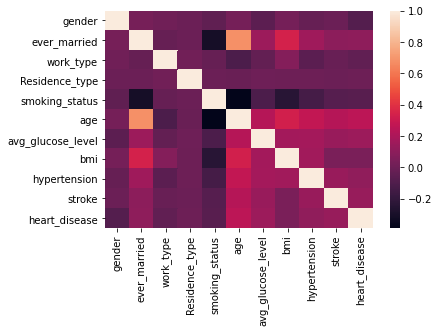

In [72]:
sns.heatmap(le_ndf.corr())

In [73]:
#split data to feature and target variable
feat_col = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status', 'age', 'avg_glucose_level', 'bmi']
x = le_ndf[feat_col]
y = le_ndf.stroke

#train test split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#logistic Regression using linear_model package
from sklearn.linear_model import LogisticRegression

#initiate the model
logreg = LogisticRegression()

#apply the data with model
logreg.fit(x_train, y_train)

#test data
y_pred = logreg.predict(x_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

[[1418    0]
 [  55    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.93      0.96      0.94      1473



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 257.44, 'Predicted label')

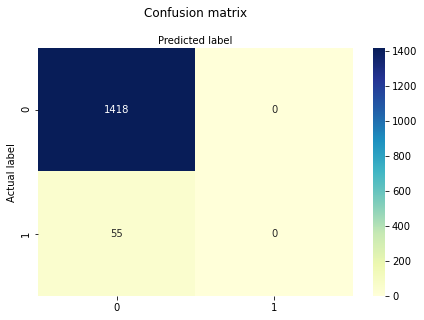

In [75]:
class_names = ['True','False'] # true||false
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### K-Nearest-Neighbors

In [65]:
# split data into train and test
y = df[['stroke']]
x = df[['gender','age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3436, 10) (1473, 10) (3436, 1) (1473, 1)


In [66]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape,X_test.shape)

(3436, 10) (1473, 10)


In [67]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [68]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

[[1409    9]
 [  55    0]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1418
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.93      0.96      0.94      1473



Text(0.5, 257.44, 'Predicted label')

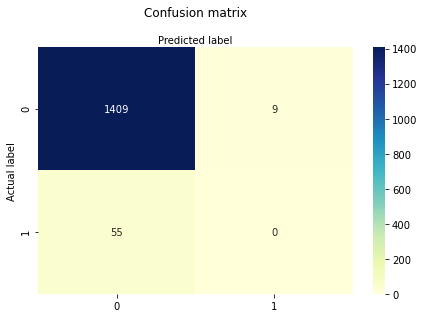

In [69]:
# graph confusion matrix
import numpy as np
import seaborn as sns

class_names = ['True','False'] # true||false
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Results and Conclusions

As you can see by our confusion matrix for both the logistic regression and the KNN model, our accuracy, recall and f1-score make it seem like our models are performing super well.  However, this is not the case.  Our data is super imbalanced meaning that there are not enough cases of people having a stroke in our data set.  There are some ways to fix this such as making the test set smaller in proportion to the amount of people that have had a stroke.  However, this would get rid of a significant amount of data and overall result in a model that doesn't perform well. Our group wishes that we noticed how imbalanced this dataset was earlier on so we were able to find a dataset that would've performed better.

### Who Did What

- Hannah: EDA and KNN model

- Joey: Logistic Regression Model

- Nick: Preprocessing and EDA

- Kunal: Preprocessing